# Trabalho de Análise de Dados e Big Data

## Sobre a Empresa e o Dataset

A EcoEletro é uma proeminente empresa de e-commerce atuando em eletrônicos, sua plataforma intuitiva oferece uma extensa variedade de produtos, garantindo uma experiência de compra excepcional.

A empresa EcoEletro disponibilizou um conjunto de dados referente às suas vendas no período de janeiro a março para que realizássemos uma análise pertinente sobre seus dados de vendas.

[Link do Dataset](https://docs.google.com/spreadsheets/d/1SvLK34vGdcALSUd_ye7UaQbR9dRoruYk/edit?usp=sharing&ouid=110410209786316924452&rtpof=true&sd=true)





### Transformando o dataset em dataframeme `df`


In [2]:
import pandas as pd

# Caminho para o arquivo xlsx
arquivo_excel = r'C:\Users\Lucas Janeiro\Downloads\vendas.xlsx'

# Ler o arquivo 
df = pd.read_excel(arquivo_excel)

# Visualização das primeiras linhas do DataFrame com o método head()
print(df.head())


    Nome: Sobrenome: Gênero: Estado:    Produto:  Valor Unitário:  \
0   Maria       Cruz       F      SP    Cabo USB               20   
1  Rafael  Rodrigues       M      MG       Mouse               30   
2    João      Costa       M      PR    Cabo USB               20   
3  Miguel    Almeida       M      RJ  HD Externo              600   
4  Miguel   Carvalho       M      RJ  Impressora              380   

   Quantidade:       Mês: Forma de Pagamento:  
0            7  Fevereiro                 PIX  
1           17      Março                 PIX  
2           15    Janeiro                 PIX  
3           17  Fevereiro              Cartão  
4           19      Março              Boleto  


### Público da Empresa

- Quantidade de clientes nível Nacional 

In [5]:
# Contar o número de clientes 
numero_de_clientes = df['Nome:'].count()
print(f"Quantidade de clientes em nível nacional: {numero_de_clientes}")



Quantidade de clientes em nível nacional: 2759


- Excluindo a coluna sobrenome


In [7]:
# Excluir a coluna "Sobrenome" diretamente no DataFrame atual, pois a coluna não mostra utilidade na elaboração dos principais indicadores da empresa.
df.drop('Sobrenome:', axis=1, inplace=True)


- Quantidade de clientes por Estado

In [13]:
# Agrupar o DataFrame pelo estado e contar o número de entradas em cada estado
entradas_por_estado = df.groupby('Estado:').size()

# Exibindo a quantidade de entradas por estado
print(entradas_por_estado)


Estado:
BA    606
MG    537
PR    551
RJ    526
SP    539
dtype: int64


- Gênero do Público

In [19]:
# Contar a quantidade de entradas para cada gênero
contagem_genero = df['Gênero:'].value_counts()

# Calcular a porcentagem de cada gênero
porcentagem_genero = (df['Gênero:'].value_counts(normalize=True) * 100)

# Exibindo a quantidade e porcentagem de cada gênero
for genero, contagem in contagem_genero.items():
    porcentagem = porcentagem_genero[genero]
    print(f"Gênero: {genero}, Quantidade: {contagem}, Porcentagem: {porcentagem:.2f}%")


Gênero: M, Quantidade: 1536, Porcentagem: 55.67%
Gênero: F, Quantidade: 1223, Porcentagem: 44.33%


- maior Gênero por Estado

In [18]:
# Agrupar por estado e gênero e contar as entradas em cada grupo
contagem_estado_genero = df.groupby(['Estado:', 'Gênero:']).size()

# Encontrar o gênero mais frequente em cada estado
genero_mais_frequente = contagem_estado_genero.groupby('Estado:').idxmax().apply(lambda x: x[1])

# Exibindo o gênero mais frequente por estado
for estado, genero in genero_mais_frequente.items():
    print(f"Estado: {estado}, Gênero Mais Frequente: {genero}")


Estado: BA, Gênero Mais Frequente: M
Estado: MG, Gênero Mais Frequente: M
Estado: PR, Gênero Mais Frequente: M
Estado: RJ, Gênero Mais Frequente: M
Estado: SP, Gênero Mais Frequente: M


- Ranking da forma de pagamento dos clientes Nivel Nacional 

In [15]:
# Contar a quantidade de cada forma de pagamento
contagem_forma_pagamento = df['Forma de Pagamento:'].value_counts()

# Exibindo o ranking das formas de pagamento
print("Ranking da Forma de Pagamento:")
for i, (forma_pagamento, contagem) in enumerate(contagem_forma_pagamento.items(), 1):
    print(f"{i}. Forma de Pagamento: {forma_pagamento}, Quantidade: {contagem}")


Ranking da Forma de Pagamento:
1. Forma de Pagamento: Cartão, Quantidade: 942
2. Forma de Pagamento: Boleto, Quantidade: 937
3. Forma de Pagamento: PIX, Quantidade: 880


- Forma de pagamento mais usado em cada estado

In [20]:
# Agrupar o DataFrame por estado e forma de pagamento e contar o número de ocorrências
contagem_estado_forma_pagamento = df.groupby(['Estado:', 'Forma de Pagamento:']).size()

# Encontrar o método de pagamento mais comum para cada estado
pagamento_mais_comum_por_estado = contagem_estado_forma_pagamento.groupby('Estado:').idxmax()

# Exibindo o método de pagamento mais comum para cada estado
for estado, pagamento_mais_comum in pagamento_mais_comum_por_estado.items():
    _, forma_pagamento = pagamento_mais_comum
    contagem = contagem_estado_forma_pagamento[pagamento_mais_comum]
    print(f"Estado: {estado}, Forma de Pagamento Mais Comum: {forma_pagamento}, Quantidade: {contagem}")


Estado: BA, Forma de Pagamento Mais Comum: Cartão, Quantidade: 218
Estado: MG, Forma de Pagamento Mais Comum: Boleto, Quantidade: 206
Estado: PR, Forma de Pagamento Mais Comum: Cartão, Quantidade: 199
Estado: RJ, Forma de Pagamento Mais Comum: Cartão, Quantidade: 188
Estado: SP, Forma de Pagamento Mais Comum: Boleto, Quantidade: 193


### Financeiro da Empresa

-  Faturamento Nacional 

In [23]:
# Calcular o faturamento nacional
faturamento_nacional = (df['Quantidade:'] * df['Valor Unitário:']).sum()

# Exibir o faturamento nacional
print(f"Faturamento Nacional: R${faturamento_nacional:.2f}")



Faturamento Nacional: R$24237760.00


- Faturamento por Estado

In [31]:
# Criar uma nova coluna 'Faturamento_temp:' que é o produto da quantidade pelo valor unitário
df['Faturamento_temp:'] = df['Quantidade:'] * df['Valor Unitário:']

# Agrupar pelo estado e somar o faturamento para cada estado
faturamento_por_estado = df.groupby('Estado:')['Faturamento_temp:'].sum()

# Exibir o faturamento por estado
for estado, faturamento in faturamento_por_estado.items():
    print(f"Estado: {estado}, Faturamento: R${faturamento:.2f}")

# Excluir a coluna 'Faturamento_temp
df.drop(columns=['Faturamento_temp:'], inplace=True)

Estado: BA, Faturamento: R$5101550.00
Estado: MG, Faturamento: R$4859570.00
Estado: PR, Faturamento: R$4685460.00
Estado: RJ, Faturamento: R$4944640.00
Estado: SP, Faturamento: R$4646540.00


- Faturamento por Gênero



In [33]:
# Criar uma nova coluna 'Faturamento_temp:' que é o produto da quantidade pelo valor unitário
df['Faturamento_temp:'] = df['Quantidade:'] * df['Valor Unitário:']

# Agrupar pelo gênero e somar o faturamento para cada gênero
faturamento_por_genero = df.groupby('Gênero:')['Faturamento_temp:'].sum()

# Exibir o faturamento por gênero
for genero, faturamento in faturamento_por_genero.items():
    print(f"Gênero: {genero}, Faturamento: R${faturamento:.2f}")

# Excluir a coluna 'Faturamento_temp:'
df.drop(columns=['Faturamento_temp:'], inplace=True)

Gênero: F, Faturamento: R$10698980.00
Gênero: M, Faturamento: R$13538780.00


- Produto que mais gerou faturamento a empresa


In [34]:
# Criar a coluna 'Faturamento_temp:' que é o produto da quantidade pelo valor unitário
df['Faturamento_temp:'] = df['Quantidade:'] * df['Valor Unitário:']

# Agrupar pelo produto e somar o faturamento para cada produto
faturamento_por_produto = df.groupby('Produto:')['Faturamento_temp:'].sum()

# Encontrar o produto com o maior faturamento
produto_mais_lucrativo = faturamento_por_produto.idxmax()
faturamento_max = faturamento_por_produto.max()

# Exibir o produto que mais gerou faturamento
print(f"Produto que mais gerou faturamento: {produto_mais_lucrativo}, Faturamento: R${faturamento_max:.2f}")

# Excluir a coluna 'Faturamento_temp:'
df.drop(columns=['Faturamento_temp:'], inplace=True)

Produto que mais gerou faturamento: VR Óculos, Faturamento: R$4600000.00


- Mês que mais gerou faturamento
  

In [64]:
# Calcular o faturamento em cada mês
df['Faturamento_temp:'] = df['Quantidade:'] * df['Valor Unitário:']
faturamento_por_mes = df.groupby('Mês:')['Faturamento_temp:'].sum()

# Encontrar o mês que mais gerou faturamento
mes_mais_lucrativo = faturamento_por_mes.idxmax()
faturamento_max_mes = faturamento_por_mes.max()

# Exibir o mês mais lucrativo
print(f"Mês que mais gerou faturamento: {mes_mais_lucrativo}, Faturamento: R${faturamento_max_mes:.2f}")

# Excluir a coluna temporária 'Faturamento_temp:'
df.drop(columns=['Faturamento_temp:'], inplace=True)

Mês que mais gerou faturamento: Março, Faturamento: R$8305350.00


### Sobre os Produtos e Quantidade

- Quantidade do Produto mais vendidos  Nacionalmente 

In [35]:
# Agrupar pelo produto e somar as quantidades para cada produto
quantidade_por_produto = df.groupby('Produto:')['Quantidade:'].sum()

# Encontrar o produto mais vendido
produto_mais_vendido = quantidade_por_produto.idxmax()
quantidade_max = quantidade_por_produto.max()

print(f"Produto mais vendido: {produto_mais_vendido}, Quantidade: {quantidade_max}")


Produto mais vendido: VR Óculos, Quantidade: 1840


- Quantidade do Produto menos vendidos Nacionalmente

In [37]:
# Encontrar o produto menos vendido
produto_menos_vendido = quantidade_por_produto.idxmin()
quantidade_min = quantidade_por_produto.min()

print(f"Produto menos vendido: {produto_menos_vendido}, Quantidade: {quantidade_min}")


Produto menos vendido: Teclado, Quantidade: 1319


- Produto mais vendido de cada estado

In [38]:
produto_mais_vendido_por_estado = df.groupby('Estado:')['Produto:'].apply(lambda x: x.mode()[0])

for estado, produto in produto_mais_vendido_por_estado.items():
    print(f"Estado: {estado}, Produto mais vendido: {produto}")


Estado: BA, Produto mais vendido: HD Externo
Estado: MG, Produto mais vendido: Laptop
Estado: PR, Produto mais vendido: Mouse
Estado: RJ, Produto mais vendido: Fone
Estado: SP, Produto mais vendido: HD Externo


- Produto menos vendido de cada Estado

In [39]:
# Criar um DataFrame agrupado por Estado e Produto e somar as quantidades para cada combinação
grupo_estado_produto = df.groupby(['Estado:', 'Produto:'])['Quantidade:'].sum().reset_index()

# Inicializar um dicionário vazio para armazenar o resultado
produto_menos_vendido_por_estado = {}

# Iterar sobre cada estado no DataFrame original
for estado in df['Estado:'].unique():
    # Filtrar o DataFrame agrupado para incluir apenas linhas para o estado atual
    df_estado = grupo_estado_produto[grupo_estado_produto['Estado:'] == estado]
    
    # Encontrar o produto com a quantidade mínima para o estado atual
    produto_menos_vendido = df_estado.loc[df_estado['Quantidade:'].idxmin()]['Produto:']
    
    # Adicionar o resultado ao dicionário
    produto_menos_vendido_por_estado[estado] = produto_menos_vendido

# Exibir o produto menos vendido por estado
for estado, produto in produto_menos_vendido_por_estado.items():
    print(f"Estado: {estado}, Produto menos vendido: {produto}")


Estado: SP, Produto menos vendido: Fone
Estado: MG, Produto menos vendido: Aspirador
Estado: PR, Produto menos vendido: Teclado
Estado: RJ, Produto menos vendido: Teclado
Estado: BA, Produto menos vendido: Videogame


- Gênero que mais comprou 

In [40]:
genero_mais_compras = df['Gênero:'].mode()[0]

print(f"Gênero que mais comprou produtos: {genero_mais_compras}")

Gênero que mais comprou produtos: M


- Produto mais vendido por Gênero

In [41]:
produto_mais_vendido_por_genero = df.groupby('Gênero:')['Produto:'].apply(lambda x: x.mode()[0])

for genero, produto in produto_mais_vendido_por_genero.items():
    print(f"Gênero: {genero}, Produto mais vendido: {produto}")


Gênero: F, Produto mais vendido: HD Externo
Gênero: M, Produto mais vendido: Laptop


- Mês que mais vendeu produtos

In [65]:
# Calcular o total de produtos vendidos em cada mês
produtos_vendidos_por_mes = df.groupby('Mês:')['Quantidade:'].sum()

# Encontrar o mês que mais vendeu produtos
mes_mais_vendido = produtos_vendidos_por_mes.idxmax()
quantidade_max_mes = produtos_vendidos_por_mes.max()

# Exibir o mês mais vendido
print(f"Mês que mais vendeu produtos: {mes_mais_vendido}, Quantidade vendida: {quantidade_max_mes}")

Mês que mais vendeu produtos: Janeiro, Quantidade vendida: 9999


- Média Sobre a Quantidade de Produtos Comprados pelo Cliente

In [44]:
# Calcular a média da quantidade de produtos comprados por todos os clientes
media_total = df['Quantidade:'].mean()

# Exibir a média total com duas casas decimais
print("Média da Quantidade de Produtos Comprados por Todos os Clientes: {:.2f}".format(media_total))




Média da Quantidade de Produtos Comprados por Todos os Clientes: 10.68


- Média Sobre Quantidade de Produtos Comprados pelo Gênero

In [47]:
# Calcular a média da quantidade de produtos comprados por gênero
media_por_genero = df.groupby('Gênero:')['Quantidade:'].mean()

# Exibir a média por gênero com duas casas decimais
print("\nMédia da Quantidade de Produtos Comprados por Gênero:")
print(media_por_genero.round(2))



Média da Quantidade de Produtos Comprados por Gênero:
Gênero:
F    10.64
M    10.71
Name: Quantidade:, dtype: float64


- Média Sobre Quantidade de Produtos Comprados por Estado

In [48]:
# Calcular a média da quantidade de produtos comprados por estado
media_por_estado = df.groupby('Estado:')['Quantidade:'].mean()

# Exibir a média por estado com duas casas decimais
print("\nMédia da Quantidade de Produtos Comprados por Estado:")
print(media_por_estado.round(2))



Média da Quantidade de Produtos Comprados por Estado:
Estado:
BA    10.72
MG    11.01
PR    10.31
RJ    10.56
SP    10.79
Name: Quantidade:, dtype: float64


- Mediana e Desvio Padrão da Quantidade de Produtos Vendidos

In [51]:
# Calcular a mediana da quantidade de produtos vendidos
mediana_quantidade = df['Quantidade:'].median()

# Calcular o desvio padrão da quantidade de produtos vendidos
desvio_padrao_quantidade = df['Quantidade:'].std()

# Exibir as estatísticas
print("\nEstatísticas da Quantidade de Produtos Vendidos:")
print(f"Mediana: {mediana_quantidade}")
print(f"Desvio Padrão da Quantidade de Produtos Vendidos: {desvio_padrao_quantidade:.2f}")


Estatísticas da Quantidade de Produtos Vendidos:
Mediana: 11.0
Desvio Padrão da Quantidade de Produtos Vendidos: 5.80


- Teste Normalidade 

In [55]:
from scipy.stats import shapiro

# Realizar o teste de Shapiro-Wilk na quantidade vendida
stat, p = shapiro(df['Quantidade:'])

# Exibir o resultado do teste formatando o valor p com três casas decimais
print("\nTeste de Normalidade (Shapiro-Wilk):")
print(f"Estatística de Teste: {stat:.2f}")
print(f"Valor p: {p:.3e}")  # Formatando o valor p como notação científica com três casas decimais

# Verificar se a quantidade vendida segue uma distribuição normal com base no valor p
if p > 0.05:
    print("A quantidade vendida segue uma distribuição normal (p > 0.05)")
else:
    print("A quantidade vendida não segue uma distribuição normal (p <= 0.05)")



Teste de Normalidade (Shapiro-Wilk):
Estatística de Teste: 0.95
Valor p: 4.922e-30
A quantidade vendida não segue uma distribuição normal (p <= 0.05)


### Principais Gráficos para Análise


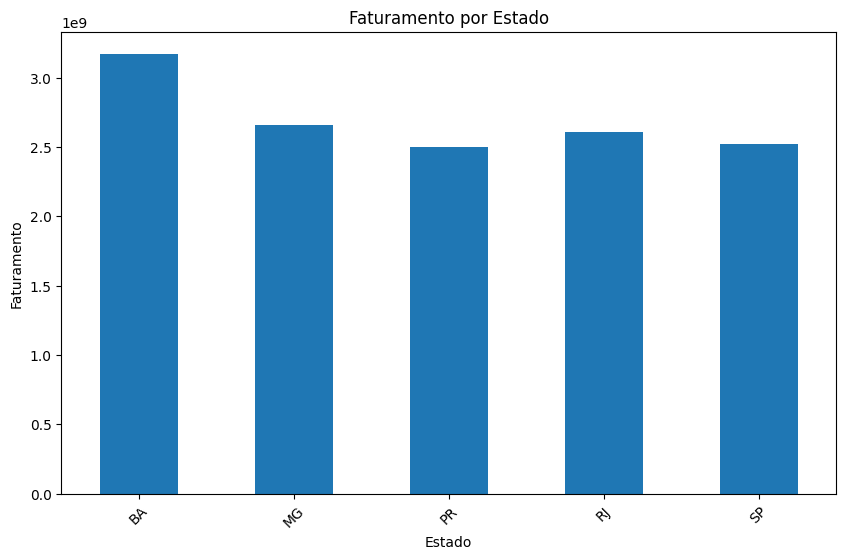

In [58]:
import matplotlib.pyplot as plt

# Calcular o faturamento por estado
faturamento_por_estado = df.groupby('Estado:')['Quantidade:'].sum() * df.groupby('Estado:')['Valor Unitário:'].sum()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
faturamento_por_estado.plot(kind='bar')
plt.title('Faturamento por Estado')
plt.xlabel('Estado')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.show()

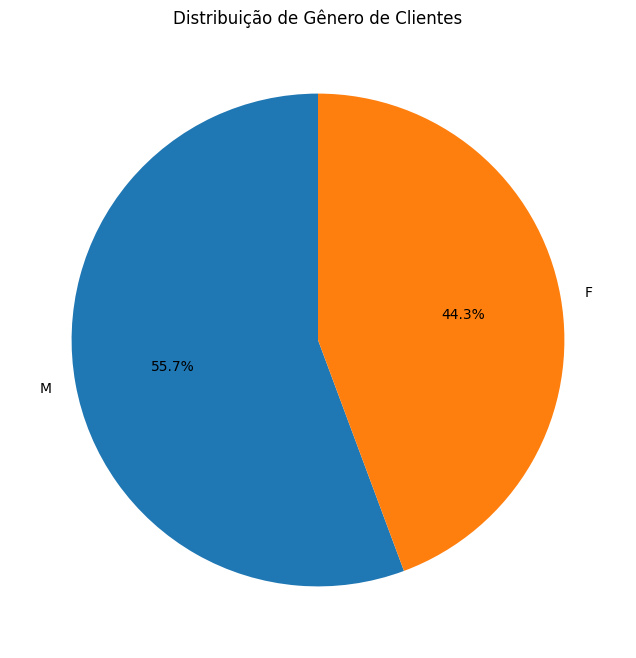

In [59]:
# Contar o número de clientes por gênero
contagem_genero = df['Gênero:'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
contagem_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Gênero de Clientes')
plt.ylabel('')
plt.show()


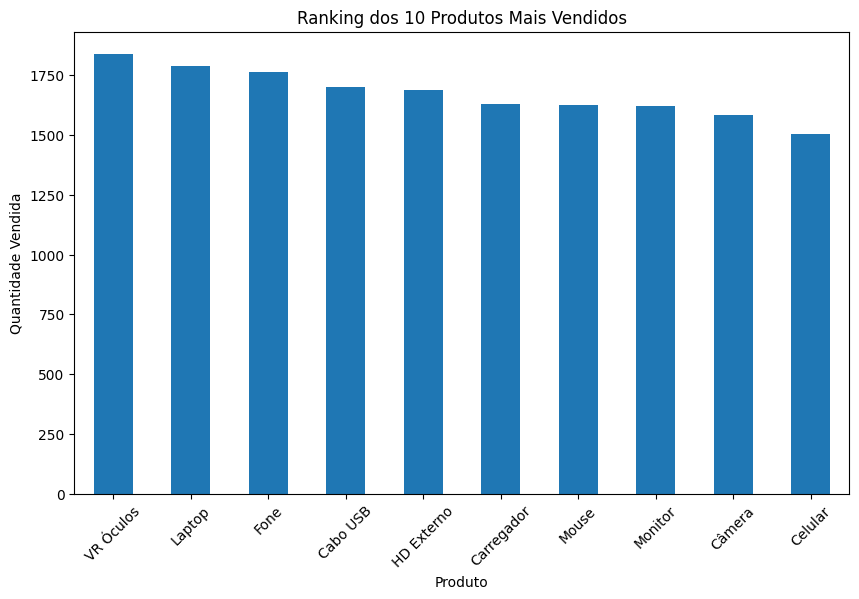

In [60]:
# Calcular a quantidade vendida por produto
quantidade_por_produto = df.groupby('Produto:')['Quantidade:'].sum()

# Ordenar os produtos por quantidade vendida em ordem decrescente
produtos_mais_vendidos = quantidade_por_produto.sort_values(ascending=False)

# Criar um gráfico de barras com os 10 produtos mais vendidos
plt.figure(figsize=(10, 6))
produtos_mais_vendidos.head(10).plot(kind='bar')
plt.title('Ranking dos 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()


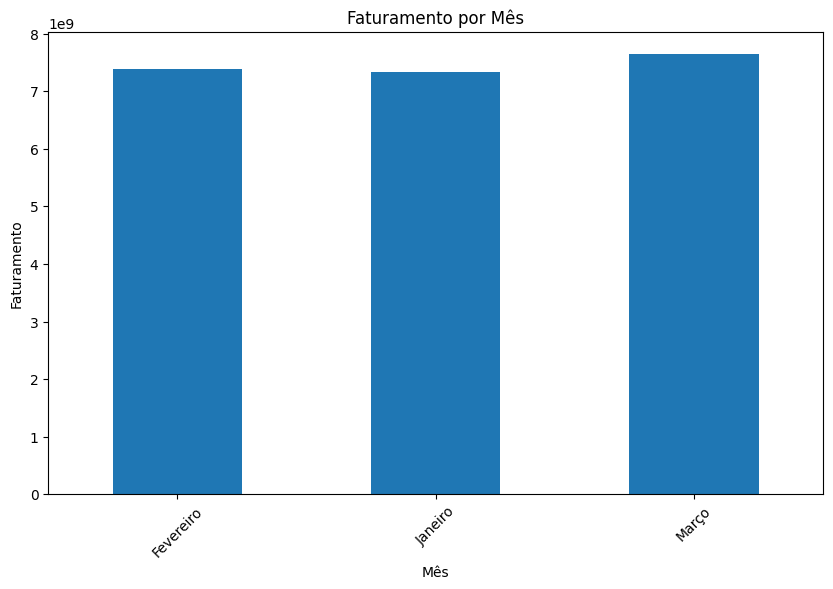

In [63]:
import matplotlib.pyplot as plt

# Calcular o faturamento por mês
faturamento_por_mes = df.groupby('Mês:')['Quantidade:'].sum() * df.groupby('Mês:')['Valor Unitário:'].sum()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
faturamento_por_mes.plot(kind='bar')
plt.title('Faturamento por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.show()


### Regionalização da Empresa EcoEletro


**Produtos Mais Vendidos por Estado:**
- Observar quais produtos são mais vendidos em cada estado fornece informações valiosas sobre as preferências regionais dos clientes. Isso pode ser usado para adaptar a estratégia de estoque e marketing em cada região.
- No exemplo fornecido, temos as informações sobre o produto mais vendido em cada estado, o que pode indicar quais produtos têm uma demanda mais forte em cada localidade.
- A empresa pode usar esses insights para:
  - Garantir que os produtos mais populares em cada estado estejam sempre disponíveis em estoque, evitando a falta de produtos que os clientes desejam.
  - Realizar promoções específicas para os produtos mais populares em determinadas regiões para aumentar as vendas.
  - Adaptar a estratégia de marketing, destacando os produtos mais vendidos em campanhas publicitárias locais.
  - Desenvolver parcerias estratégicas com fornecedores ou fabricantes de produtos populares em regiões específicas.

**Produtos Menos Vendidos por Estado:**
- Da mesma forma, identificar os produtos menos vendidos em cada estado é igualmente importante. Isso pode indicar produtos que não têm uma demanda significativa em determinadas regiões.
- A empresa pode usar esses insights para:
  - Avaliar se vale a pena manter em estoque produtos que têm baixa demanda em determinados estados.
  - Considerar a realização de promoções ou campanhas de marketing direcionadas para impulsionar a venda de produtos menos populares em regiões específicas.
  - Explorar a possibilidade de iprodutos ou variedadesos ou variedades que sejam mais alinhados com as pclientesias dos clAante notar que a análise dos produtos mais e menos vendidos por estado é uma ferramenta valiosa para a gestão de estoque e estratégia de vendas. Isso ajuda a empresa a ser mais eficiente em atender às necessidades dos clientes em diferentes regiões, otimizar seus recursos e maximizar suas vendas. Além disso, permite uma abordagem mais personalizada em relação aos gostos e preferências dos clientes em todo o país.